In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
val_scores = pd.read_csv('../results/metrics/sl_l1/sl_l1_val_metrics.csv')
test_scores = pd.read_csv('../results/metrics/sl_l1/sl_l1_test_metrics.csv')

In [3]:
val_scores.head()

,iter_id,fold_id,param_id,mse,ate,pehe
0,1,1,1,2.255002,0.041934,1.123916
1,1,1,2,2.255002,0.041934,1.123916
2,1,1,3,2.177959,0.235089,1.147474
3,1,1,4,2.177959,0.235089,1.147474
4,1,1,5,1.736720,1.728843,2.061632


In [4]:
val_scores_mean = val_scores.groupby(['iter_id', 'param_id'], as_index=False).mean()
val_scores_mean = val_scores_mean.drop(columns=['fold_id'])

In [5]:
val_scores_mean

,iter_id,param_id,mse,ate,pehe
0,1,1,1.734136,0.138892,0.837275
1,1,2,1.734136,0.138892,0.837275
2,1,3,1.676312,0.323823,0.894049
3,1,4,1.676312,0.323823,0.894049
4,1,5,1.316637,1.840147,2.025795
...,...,...,...,...,...
155,10,12,1.007023,4.789806,10.085521
156,10,13,1.007023,4.789806,10.085521
157,10,14,1.007023,4.789806,10.085521
158,10,15,1.007023,4.789806,10.085521


In [6]:
df_merged = val_scores_mean.merge(test_scores, on=['iter_id', 'param_id'], suffixes=['_val', '_test'])

In [7]:
df_merged

,iter_id,param_id,mse_val,ate_val,pehe_val,mse_test,ate_test,pehe_test
0,1,1,1.734136,0.138892,0.837275,1.811857,0.147419,0.972757
1,1,2,1.734136,0.138892,0.837275,1.811857,0.147419,0.972757
2,1,3,1.676312,0.323823,0.894049,1.757062,0.341475,1.020357
3,1,4,1.676312,0.323823,0.894049,1.757062,0.341475,1.020357
4,1,5,1.316637,1.840147,2.025795,1.385209,1.856383,2.090617
...,...,...,...,...,...,...,...,...
155,10,12,1.007023,4.789806,10.085521,0.855066,2.778521,8.885993
156,10,13,1.007023,4.789806,10.085521,0.855066,2.778521,8.885993
157,10,14,1.007023,4.789806,10.085521,0.855066,2.778521,8.885993
158,10,15,1.007023,4.789806,10.085521,0.855066,2.778521,8.885993


In [8]:
df_merged[['ate_val', 'pehe_val', 'ate_test', 'pehe_test']].corrwith(df_merged['mse_val'])

ate_val     -0.590408
pehe_val    -0.124305
ate_test    -0.443599
pehe_test   -0.134976
dtype: float64

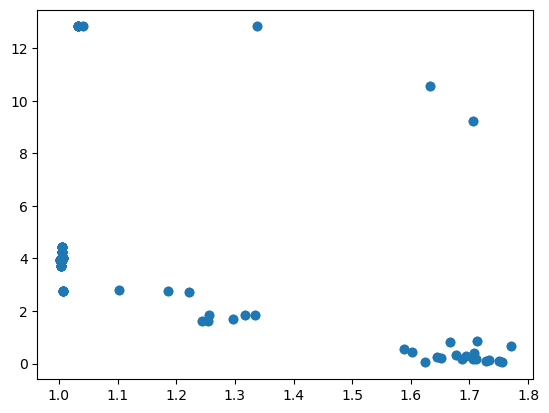

In [9]:
plt.scatter(df_merged['mse_val'], df_merged['ate_test'])
plt.show()

In [10]:
corr_per_iter = df_merged.groupby(['iter_id'], as_index=False).corrwith(df_merged['mse_val'])
corr_per_iter

,iter_id,param_id,mse_val,ate_val,pehe_val,mse_test,ate_test,pehe_test
0,1,-0.853258,1.0,-0.994877,-0.988275,0.999481,-0.994940,-0.987034
1,2,-0.841952,1.0,-0.979414,-0.968909,0.999576,-0.979411,-0.963118
2,3,-0.855430,1.0,-0.996850,-0.991668,0.993667,-0.996832,-0.989410
3,4,-0.834668,1.0,-0.990012,-0.978025,0.999614,-0.989997,-0.981062
4,5,-0.801414,1.0,-0.977752,-0.957301,0.998399,-0.980385,-0.958134
5,6,-0.849201,1.0,-0.989421,-0.981418,0.999950,-0.989980,-0.979699
6,7,-0.844721,1.0,-0.980922,-0.978309,0.999301,-0.980903,-0.976850
7,8,-0.846675,1.0,-0.993165,-0.980485,0.998459,-0.990122,-0.976739
8,9,-0.860820,1.0,-0.916542,-0.919021,0.999654,-0.917364,-0.921411
9,10,-0.829784,1.0,-0.976959,-0.975613,0.999631,-0.955392,-0.967457


In [36]:
corr_res = corr_per_iter[['ate_val', 'pehe_val', 'mse_test', 'ate_test', 'pehe_test']].agg(['mean', 'std'])
corr_res

,ate_val,pehe_val,mse_test,ate_test,pehe_test
mean,-0.979591,-0.971902,0.998773,-0.977533,-0.970091
std,0.023353,0.020907,0.001866,0.024216,0.019808


In [38]:
corr_res['ate_val']

mean   -0.979591
std     0.023353
Name: ate_val, dtype: float64

In [16]:
iter_gr = df_merged.groupby(['iter_id'], as_index=False)

In [22]:
best_mse_iter = iter_gr.apply(lambda x: x.loc[x['mse_val'].idxmin(), ['ate_test', 'pehe_test']])
best_mse_iter

,iter_id,ate_test,pehe_test
0,1,4.030549,4.143652
1,2,3.959626,4.083663
2,3,3.997861,4.122987
3,4,4.444310,4.775269
4,5,4.262547,5.103297
5,6,3.937132,4.012494
6,7,3.958500,3.973770
7,8,3.711442,3.983482
8,9,12.825093,26.894725
9,10,2.778521,8.885993


In [23]:
best_ate_iter = iter_gr.apply(lambda x: x.loc[x['ate_test'].idxmin(), ['ate_test']])
best_ate_iter

,iter_id,ate_test
0,1,0.147419
1,2,0.103783
2,3,0.119045
3,4,0.678119
4,5,0.386891
5,6,0.049008
6,7,0.163133
7,8,0.044610
8,9,9.238648
9,10,0.430181


In [24]:
best_pehe_iter = iter_gr.apply(lambda x: x.loc[x['pehe_test'].idxmin(), ['pehe_test']])
best_pehe_iter

,iter_id,pehe_test
0,1,0.972757
1,2,1.004210
2,3,1.015038
3,4,1.873806
4,5,2.832669
5,6,0.775566
6,7,0.384368
7,8,1.447522
8,9,25.381013
9,10,8.451376


In [29]:
def risk_mse(a, b):
    return np.mean(np.square(a - b))

def risk_rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

def risk(best, achieved):
    return np.array(achieved - best)

In [33]:
r = (best_mse_iter['ate_test'] - best_ate_iter['ate_test']).agg(['mean', 'std'])


In [35]:
r['std']

0.4701980033122762

In [32]:
(best_mse_iter['pehe_test'] - best_pehe_iter['pehe_test']).agg(['mean', 'std'])

mean    2.584101
std     0.958485
Name: pehe_test, dtype: float64